In [1]:
import pandas as pd
import numpy as np
import random
import os
import gc
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [18]:
import pandas as pd
train = pd.read_csv("C:/Users/kyoun/Downloads/open (1)/open/train.csv")
test = pd.read_csv("C:/Users/kyoun/Downloads/open (1)/open/test.csv")
train

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,151.0
7496,TRAIN_7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,114.0
7497,TRAIN_7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,41.0
7498,TRAIN_7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,57.0


In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(2026) # Seed 고정

In [4]:
ordinal_features = ['Weight_Status', 'Gender']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[feature] = le.transform(test[feature])

In [5]:
train_x = train[['Exercise_Duration', 'Gender','BPM','Age','Weight(lb)']]
train_y = train['Calories_Burned']
test_x = test[['Exercise_Duration', 'Gender','BPM','Age','Weight(lb)']]

In [6]:
def custom_scoring_function(estimator, X, y):
    y_pred = estimator.predict(X)
    return -mean_squared_error(y, np.rint(y_pred))

In [ ]:
pipeline = Pipeline([('poly', PolynomialFeatures(degree=3)),
                     ('reduce_dim', SelectKBest(f_regression,k=27)),
                     ('regressor', LinearRegression())])

In [8]:
pipeline.fit(train_x, train_y)
test_y_pred = pipeline.predict(test_x)
test_y_pred =np.rint(test_y_pred )
test_y_pred 

array([173., 189.,  53., ..., 130.,  32., 191.], shape=(7500,))

In [9]:
# 교차 검증 수행
scores = np.sqrt(-cross_val_score(pipeline, train_x,train_y, cv=5, scoring=custom_scoring_function))
scores
# 교차 검증 평균 점수 출력
print('Cross-validation RMSE:', scores.mean())

Cross-validation RMSE: 0.11522171971594893


In [ ]:
rmse_list = []
k_list = []

best_rmse = np.inf
best_k = None

for k in range(1, 100):
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=3, include_bias=False)),
        ('reduce_dim', SelectKBest(f_regression, k=k)),
        ('regressor', LinearRegression())
    ])

    rmse_scores = np.sqrt(
        -cross_val_score(
            pipeline,
            train_x,
            train_y,
            cv=5,
            scoring=custom_scoring_function
        )
    )

    mean_rmse = rmse_scores.mean()

    rmse_list.append(mean_rmse)
    k_list.append(k)

    # 🔥 best K 갱신
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_k = k

    print(f"K={k:2d} | RMSE={mean_rmse:.5f}")

print("\n🔥 최적 결과 🔥")
print(f"Best K     : {best_k}")
print(f"Best RMSE  : {best_rmse:.5f}")


K= 1 | RMSE=12.29205
K= 2 | RMSE=12.25151
K= 3 | RMSE=12.25240
K= 4 | RMSE=12.23845
K= 5 | RMSE=12.22579
K= 6 | RMSE=11.68792
K= 7 | RMSE=11.68306
K= 8 | RMSE=11.68862
K= 9 | RMSE=11.68856
K=10 | RMSE=11.69018
K=11 | RMSE=11.55858
K=12 | RMSE=7.67613
K=13 | RMSE=6.64013
K=14 | RMSE=6.10769
K=15 | RMSE=6.06682
K=16 | RMSE=4.71714
K=17 | RMSE=4.10822
K=18 | RMSE=4.10797
K=19 | RMSE=4.09824
K=20 | RMSE=3.87062
K=21 | RMSE=3.87047
K=22 | RMSE=3.75329
K=23 | RMSE=2.42989
K=24 | RMSE=2.41233
K=25 | RMSE=0.57496
K=26 | RMSE=0.11673
K=27 | RMSE=0.11522
K=28 | RMSE=0.11789
K=29 | RMSE=0.11684
K=30 | RMSE=0.11726
K=31 | RMSE=0.11893
K=32 | RMSE=0.12049
K=33 | RMSE=0.11983
K=34 | RMSE=0.12071
K=35 | RMSE=0.12036
K=36 | RMSE=0.12243
K=37 | RMSE=0.12601
K=38 | RMSE=0.12999
K=39 | RMSE=0.13045
K=40 | RMSE=0.13043
K=41 | RMSE=0.12992
K=42 | RMSE=0.13044
K=43 | RMSE=0.13044
K=44 | RMSE=0.13080
K=45 | RMSE=0.13256
K=46 | RMSE=0.13256
K=47 | RMSE=0.13651
K=48 | RMSE=0.13646
K=49 | RMSE=0.13838
K=50 | RM

In [11]:
# 파이프라인 학습
pipeline.fit(train_x, train_y)

# 단계별 객체 꺼내기
poly = pipeline.named_steps['poly']
selector = pipeline.named_steps['reduce_dim']

# 다항식 feature 이름 생성
poly_feature_names = poly.get_feature_names_out(train_x.columns)

# SelectKBest 점수
scores = selector.scores_

# 선택된 feature mask
selected_mask = selector.get_support()

# 선택된 feature + score 정리
feature_scores = pd.DataFrame({
    'feature': poly_feature_names,
    'score': scores
})

feature_scores = feature_scores[selected_mask]
feature_scores = feature_scores.sort_values(by='score', ascending=False)

feature_scores.head(20)

,feature,score
29,Exercise_Duration BPM^2,188371.853908
7,Exercise_Duration BPM,140717.936018
22,Exercise_Duration^2 BPM,97422.744762
5,Exercise_Duration^2,83764.275546
0,Exercise_Duration,77331.715723
24,Exercise_Duration^2 Weight(lb),51245.380695
20,Exercise_Duration^3,47866.277031
31,Exercise_Duration BPM Weight(lb),47118.388871
45,BPM^3,35505.018642
14,BPM^2,34375.246012


In [12]:
model = pipeline.named_steps['lasso']  # LinearRegression
selected_feature_names = feature_scores['feature'].values

coef_df = pd.DataFrame({
    'feature': selected_feature_names,
    'coef': model.coef_
})

coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

coef_df.head(20)


,feature,coef,abs_coef
0,Exercise_Duration BPM^2,-5.101602,5.101602
6,Exercise_Duration^3,-4.160517,4.160517
25,Exercise_Duration Gender^2,-4.160517,4.160517
2,Exercise_Duration^2 BPM,0.208417,0.208417
7,Exercise_Duration BPM Weight(lb),0.111770,0.111770
1,Exercise_Duration BPM,-0.069643,0.069643
10,Exercise_Duration Weight(lb),-0.069643,0.069643
35,Age,-0.069643,0.069643
26,BPM Weight(lb),0.044265,0.044265
27,BPM Age,0.030331,0.030331


In [13]:
submit = pd.read_csv("C:/Users/kyoun/Downloads/open (1)/open/sample_submission.csv")

In [14]:
submit["Calories_Burned"] = test_y_pred
submit

,ID,Calories_Burned
0,TEST_0000,173.0
1,TEST_0001,189.0
2,TEST_0002,53.0
3,TEST_0003,161.0
4,TEST_0004,226.0
...,...,...
7495,TEST_7495,197.0
7496,TEST_7496,10.0
7497,TEST_7497,130.0
7498,TEST_7498,32.0


In [15]:
submit.to_csv('C:/Users/kyoun/Downloads/open (1)/open/submission.csv', index = False)

In [16]:
# 원본 feature 기준 중요도 집계
importance_dict = {}

for _, row in coef_df.iterrows():
    base_feature = row['feature'].split(' ')[0]  # 다항식 첫 변수
    importance_dict.setdefault(base_feature, 0)
    importance_dict[base_feature] += row['abs_coef']

original_importance = (
    pd.DataFrame.from_dict(importance_dict, orient='index', columns=['importance'])
      .sort_values(by='importance', ascending=False)
)

original_importance.head(15)


,importance
Exercise_Duration,9.536420e+00
Exercise_Duration^3,4.160517e+00
Exercise_Duration^2,2.275676e-01
BPM,9.701035e-02
Age,7.135827e-02
BPM^3,1.756031e-02
Age^2,1.044061e-02
Age^3,6.323605e-03
BPM^2,6.031372e-03
Gender,4.431266e-04


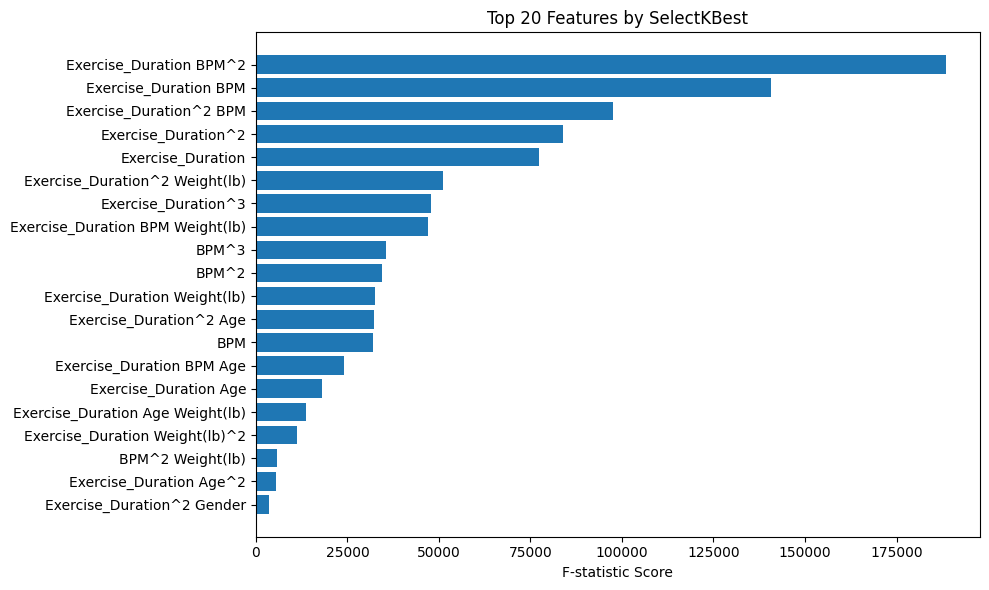

In [17]:
import matplotlib.pyplot as plt

# TOP 20 선택
top_k = 20
plot_df = feature_scores.head(top_k)

plt.figure(figsize=(10, 6))
plt.barh(plot_df['feature'], plot_df['score'])
plt.xlabel('F-statistic Score')
plt.title('Top 20 Features by SelectKBest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()